In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from gensim.models.word2vec import Word2Vec

In [7]:
from collections import OrderedDict
import os

models = OrderedDict([
    (year, Word2Vec.load('/Users/dclure/Projects/hist-vec/corpora/LemCorpR2M_models/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
    if os.path.exists('/Users/dclure/Projects/hist-vec/corpora/LemCorpR2M_models/{}.bin'.format(year))
])

In [8]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [9]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [10]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poésie


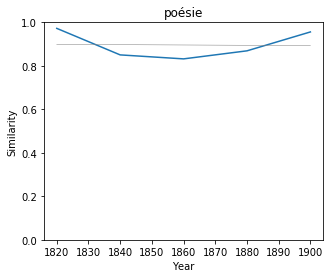

In [11]:
plot_cosine_series('littérature', 'poésie')

In [12]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [13]:
union_vocab = union_neighbor_vocab('littérature')

In [14]:
data = []
for token in union_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [15]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [16]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
417,philibert,0.015085,0.059501
542,cabanis,0.014421,0.031006
114,baudin,0.014206,0.074550
620,distraitement,0.013096,0.006957
572,futé,0.013062,0.016392
55,nerveusement,0.013014,0.076736
645,gambetta,0.012928,0.010739
712,pelletan,0.012830,0.035573
468,hervé,0.012809,0.039665
748,talloires,0.012495,0.044969


philibert


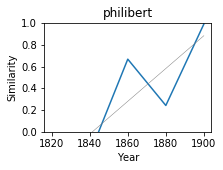

cabanis


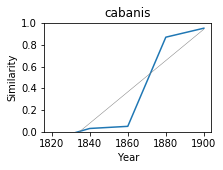

baudin


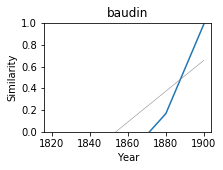

distraitement


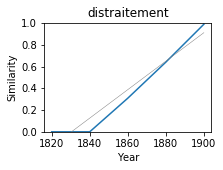

futé


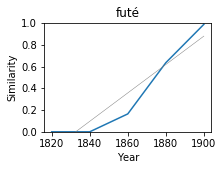

nerveusement


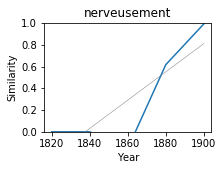

gambetta


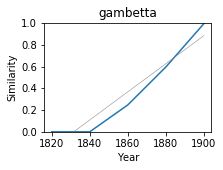

pelletan


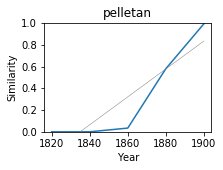

hervé


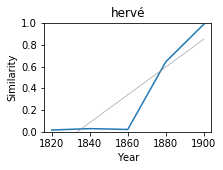

talloires


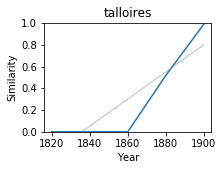

florent


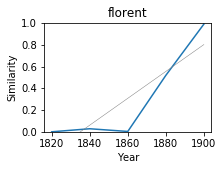

physiologie


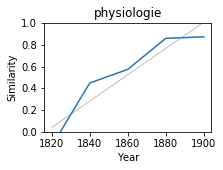

déplaisant


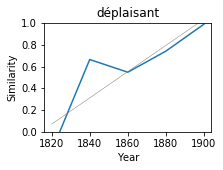

lorrain


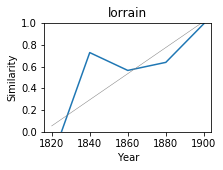

léthargique


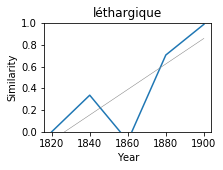

positiviste


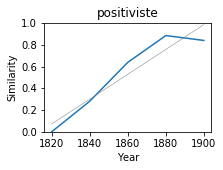

sauvegarder


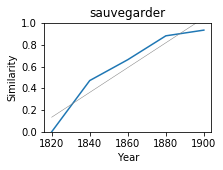

fanfreluche


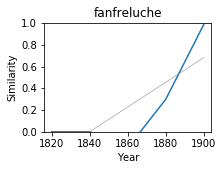

q


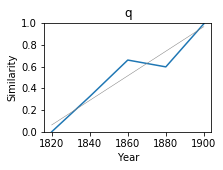

salbris


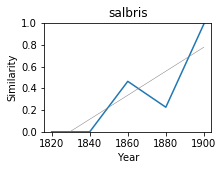

In [19]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

In [20]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
180,mahométan,-0.014636,0.003892
481,géographe,-0.013792,0.005432
166,dialecte,-0.013533,0.003135
73,argolide,-0.012036,0.053026
677,cortès,-0.011741,0.000700
39,levier,-0.010882,0.012371
727,mythologie,-0.010871,0.094226
546,toise,-0.010574,0.016841
344,détroit,-0.010430,0.002626
341,morée,-0.010413,0.027657


mahométan


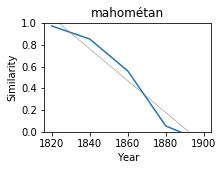

géographe


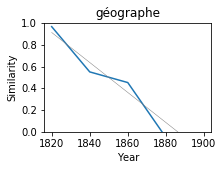

dialecte


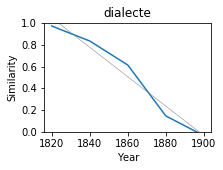

argolide


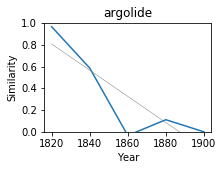

cortès


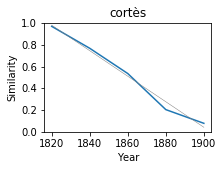

levier


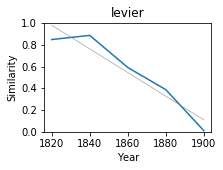

mythologie


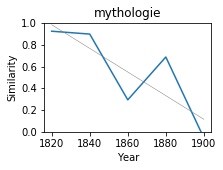

toise


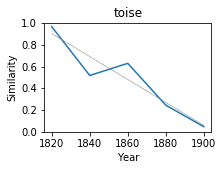

détroit


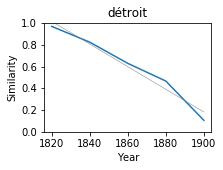

morée


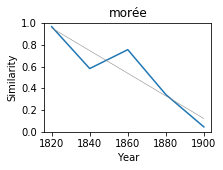

régénération


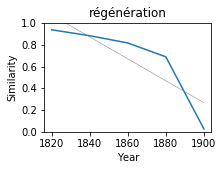

beaux


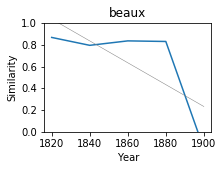

arts


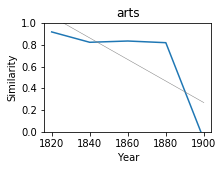

métropole


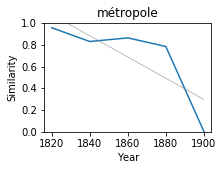

foulahs


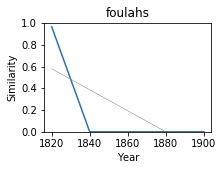

affranchissement


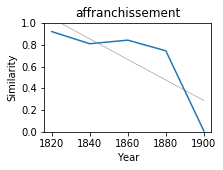

étalon


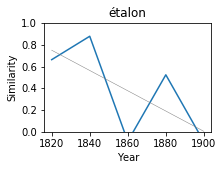

abrégé


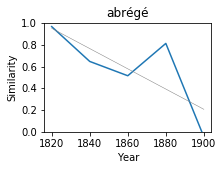

préface


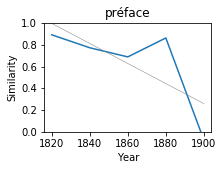

essentiellement


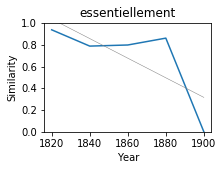

In [21]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

In [28]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [29]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [38]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [39]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [40]:
df2.sort_values('slope', ascending=False)

,token,slope,p


In [41]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)